# Briefest Description of figure
This notebook goes through the steps of creating "a figure that visualizes....".  "Insert a description of what data was used and how you manipulated that data to create the figure"

$\color{red}\text{Create a step by step of how you pulled the data into the file and how you processed it.}$ \
For example:
1. Finds the top traced and non-cropped connections to oviEN_r
2. Merges the neuron and connection data on the bodyId_pre column
3. Groups the dataframe by celltype while adding up the weights if they need to
4. Dataframe is sorted so top connections appear at the top of dataframe
5. Data is plotted and quick analysis is written

$\color{red}\text{Always write who wrote the file and if you had any inspiration, cite it here.}$ \
Written by Rhessa Weber Langstaff 

## First Step: Imports
Keep imports at the top of your code. This keeps a clean working file and keeps you organized as well.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["font.sans-serif"] = "Helvetica"
import bokeh.palettes
from neuprint import Client, fetch_simple_connections, fetch_adjacencies, NeuronCriteria as NC, SynapseCriteria as SC

# Load the authentication token 
auth_token_file = open("flybrain.auth.txt", 'r')
auth_token = next(auth_token_file).strip()
try:
    np_client = Client('neuprint.janelia.org', dataset='hemibrain:v1.2.1', token=auth_token)
except:
    np_client = None

## Second Step: Importing or querying data
This will be the data you process and work with to create the figure. It is always good save data to descriptive variables. This step will look different for each task but should be labelled well. 

In [4]:
oviEN_bodyID = 452689494 # The body ID of the oviEN neuron
nc_oviEN = NC(status = 'Traced', cropped = False) # Create a neuron criteria that only queries neurons that are Traced and non-cropped

In [5]:
# Always describe what you are doing in each cell within context to help readers follow your train of thought
# Query in all inputs for the oviEN using the neuron criteria
oviEN_neurons, roi_conn_df = fetch_adjacencies(nc_oviEN, oviEN_bodyID)

In [7]:
# Visual of neuron df from Neuprint
oviEN_neurons

,bodyId,type,instance
0,452689494,SMP550,SMP550_R
1,267551639,pC1c,pC1c_R
2,294436967,PPL203,PPL203_R
3,296203324,SMP363,SMP363_R
4,296531366,SMP362,SMP362_R
...,...,...,...
465,5813087438,LHAV6b2_a,LHAV6b2_a_R
466,5813108129,SMP358,SMP358_R
467,5813133640,None,(MBDLaxon2)
468,5901203505,SLP212,SLP212_R


In [8]:
# Visual of connection df from neuprint
roi_conn_df

,bodyId_pre,bodyId_post,roi,weight
0,267551639,452689494,SMP(R),2
1,294436967,452689494,SLP(R),1
2,296203324,452689494,SMP(R),2
3,296531366,452689494,SMP(R),3
4,296543992,452689494,SLP(R),1
...,...,...,...,...
763,5813108129,452689494,SMP(R),2
764,5813133640,452689494,SMP(R),10
765,5901203505,452689494,SLP(R),6
766,5901203505,452689494,LH(R),1


## Third Step: Processing Data
This step will vary based on the data processing required to create the figure you are hoping for. Your documentation should describe your motivation for doing certain processing. In this example, I would like to see the inputs of the oviEN sorted by type and plotted in a bar graph. I will need to merge the data I queried from Neuprint as the connections and type data are in seperate dataframes.

In [9]:
# Here I am merging the roi_conn_df with the oviEN_neurons df on the bodyID_pre column to get the types of all the presynaptic neurons
oviEN_type_data = pd.merge(oviEN_neurons, roi_conn_df, left_on='bodyId', right_on='bodyId_pre')
oviEN_type_data

,bodyId,type,instance,bodyId_pre,bodyId_post,roi,weight
0,267551639,pC1c,pC1c_R,267551639,452689494,SMP(R),2
1,294436967,PPL203,PPL203_R,294436967,452689494,SLP(R),1
2,296203324,SMP363,SMP363_R,296203324,452689494,SMP(R),2
3,296531366,SMP362,SMP362_R,296531366,452689494,SMP(R),3
4,296543992,SLP385,SLP385_R,296543992,452689494,SLP(R),1
...,...,...,...,...,...,...,...
763,5813108129,SMP358,SMP358_R,5813108129,452689494,SMP(R),2
764,5813133640,None,(MBDLaxon2),5813133640,452689494,SMP(R),10
765,5901203505,SLP212,SLP212_R,5901203505,452689494,SLP(R),6
766,5901203505,SLP212,SLP212_R,5901203505,452689494,LH(R),1


In [10]:
# I will now need to group the data by type and count the number of synapses for each type based on the weight column
# This code is a little more complex and I would recommend how to groupby on a pandas dataframe
oviEN_type_data_grouped = oviEN_type_data.groupby('type')['weight'].sum().reset_index()
oviEN_type_data_grouped

,type,weight
0,AVLP024,5
1,AVLP025,2
2,AVLP026,2
3,AVLP027,2
4,AVLP028,2
...,...,...
286,oviDNb,3
287,oviIN,369
288,pC1a,2
289,pC1c,2


In [ ]:
# Here I can sort that data as I want the strongest input to the oviEN 
oviEN_type_data_grouped = oviEN_type_data_grouped.sort_values('weight', ascending = False)

## Plotting data
This will also look a bit different each time but the important parts of the plot are always the axis labels, the title and the legend if there is one. I would also recommend screenshoting and sending plots you make to your mentor before finalizing. A fresh set of eyes or correcting what the plot shows is much more fun at the moment than down the line.

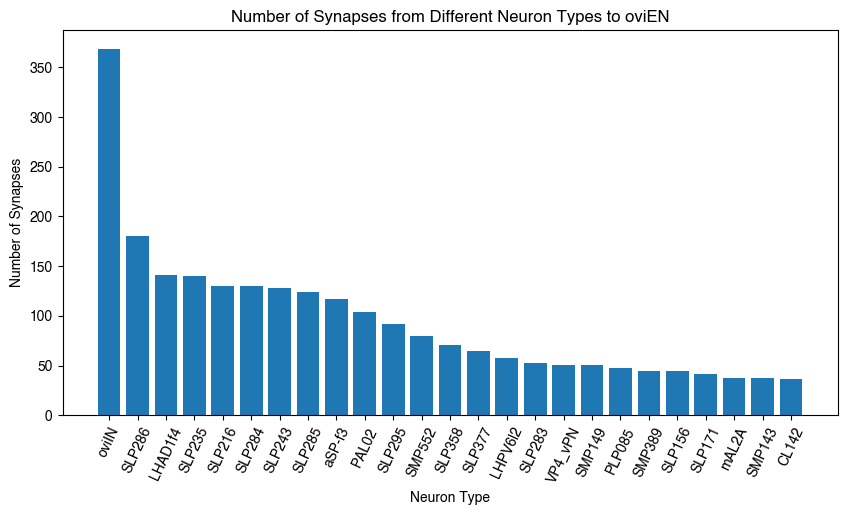

In [17]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.bar(oviEN_type_data_grouped['type'][:25], oviEN_type_data_grouped['weight'][:25])
plt.ylabel('Number of Synapses')
plt.xlabel('Neuron Type')
plt.title('Number of Synapses from Different Neuron Types to oviEN')
plt.xticks(rotation=65)
plt.show()

In [3]:
pwd

'/Users/rweberla/flybrain-clustering-rhessa'

In [6]:
# Read in df
import pandas as pd
df = pd.read_csv('/Users/rweberla/Downloads/generalized-modularity-density-main/undirected_connectome.txt', sep = '\t')
df

,source,target,weight
0,267551639,297921608,18
1,267551639,297947227,19
2,267551639,298254517,9
3,267551639,298258714,4
4,267551639,299289811,5
...,...,...,...
21391,5901213494,5813010210,1
21392,5901213494,5813010282,1
21393,5901213494,5813020840,1
21394,5901213494,5813055903,1


In [9]:
# Save df as txt file
df.to_csv('/Users/rweberla/Downloads/generalized-modularity-density-main/undirected_connectome.txt', sep=',', index = False, header = False)       